In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk

In [69]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [60]:
ps = PorterStemmer()

In [2]:
f = open("/Users/brandon/Documents/UCL/COMP0087/CW2/bds_1.txt", "r")
text = f.read()

In [10]:
temp1 = text.split('\n')

In [23]:
len(temp1)

8131

In [35]:
IDs = []
BDs = [] 
for i, p in enumerate(temp1):
    if i % 2 == 1:
        BDs.append(p)
    else:
        IDs.append(p)

In [62]:
df = pd.DataFrame(IDs,columns =['ticker:cik'])
df = df.drop(4065)
df['Bds'] = BDs

In [63]:
df.head(10)

,ticker:cik,Bds
0,MFIN:1000209,"We, Medallion Financial Corp. or the Company, ..."
1,HSIC:1000228,"General Henry Schein, Inc. is a solutions comp..."
2,CLB:1000229,General Core Laboratories N.V. is a Netherland...
3,OCC:1000230,Overview Optical Cable Corporation was incorpo...
4,KTYB:1000232,"General Kentucky Bancshares, Inc. (“Company,” ..."
5,IMH:1000298,"Impac Mortgage Holdings, Inc., sometimes refer..."
6,SWM:1000623,1 Item 1A. Risk Factors 14 Item 1B. Unresolved...
7,NVAX:1000694,"Overview Novavax, Inc., together with our whol..."
8,WAT:1000697,"General Waters Corporation (the “Company,” “we..."
9,NSP:1000753,


In [73]:
stemmed_dataset = []
for i in range(20):
    stemmed_array = df['Bds'][i].split()
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed = ' '.join(stemmed)
    stemmed_dataset.append(stemmed)
    
print(stemmed_dataset[0:5])

['we, medallion financi corp. company, financ company, organ delawar corpor includ medallion bank, primari oper subsidiary. In recent years, strateg growth medallion bank, origin consum loan purchas recreat vehicles, boats, trailer financ small-scal home improvements. We histor lead posit originating, acquiring, servic loan financ taxi medallion variou type commerci businesses. sinc medallion bank acquir consum loan portfolio began origin consum loan 2004, increas consum loan portfolio compound annual growth rate 16% (19% loan sale 2016, 2017, 2018). In januari 2017, announc plan transform overal strategy. We transit away medallion lend place strateg focu grow consum financ portfolio. total asset management, includ asset servic third parti investors, $1,660,000,000 decemb 31, 2019 $1,522,000,000 decemb 31, 2018, grown compound annual growth rate 9% $215,000,000 end 1996. sinc initi public offer 1996, paid distribut excess $263,060,000, $14.66 per share. We conduct busi variou wholly-ow

In [74]:
cv = CountVectorizer()
X = cv.fit_transform(stemmed_dataset)

In [75]:
wcss = []

In [78]:
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0, verbose = True)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 4025431.0
Iteration 1, inertia 1792335.8500000075
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 2477189.0
Iteration 1, inertia 1792335.8500000075
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 2477189.0
Iteration 1, inertia 1792335.8500000075
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 2316943.0
Iteration 1, inertia 1792335.8500000075
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 3665787.0
Iteration 1, inertia 1792335.8500000075
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 2381075.0
Iteration 1, inertia 1792335.8500000075
Converged at iterati

Initialization complete
Iteration 0, inertia 886012.0
Iteration 1, inertia 575160.4285714312
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 820941.0
Iteration 1, inertia 586459.025641026
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 820941.0
Iteration 1, inertia 586459.025641026
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 783036.0
Iteration 1, inertia 555395.4999999976
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 792824.0
Iteration 1, inertia 550909.4422222209
Iteration 2, inertia 543111.490909097
Converged at iteration 2: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 746126.0
Iteration 1, inertia 520995.6266666

Iteration 0, inertia 255255.0
Iteration 1, inertia 168629.07142857104
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 245003.0
Iteration 1, inertia 168458.74999999953
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 263015.0
Iteration 1, inertia 179601.4999999996
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 252301.0
Iteration 1, inertia 165824.30000000022
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 311305.0
Iteration 1, inertia 159790.11111111077
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 181490.0
Iteration 1, inertia 134641.11111111077
Converged at iteration 1: center shift 0.0 within t

Initialization complete
Iteration 0, inertia 33849.0
Iteration 1, inertia 25379.200000000066
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 33849.0
Iteration 1, inertia 25379.200000000066
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 34416.0
Iteration 1, inertia 26034.000000000022
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 53837.0
Iteration 1, inertia 32596.0
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 44668.0
Iteration 1, inertia 25118.75
Converged at iteration 1: center shift 0.0 within tolerance 0.0009927638473468485
Initialization complete
Iteration 0, inertia 11139.0
Iteration 1, inertia 8354.25
Converged at iteration 1: center shift 0.0 within tolerance 0.00

Iteration 208, inertia 0.0
Iteration 209, inertia 0.0
Iteration 210, inertia 0.0
Iteration 211, inertia 0.0
Iteration 212, inertia 0.0
Iteration 213, inertia 0.0
Iteration 214, inertia 0.0
Iteration 215, inertia 0.0
Iteration 216, inertia 0.0
Iteration 217, inertia 0.0
Iteration 218, inertia 0.0
Iteration 219, inertia 0.0
Iteration 220, inertia 0.0
Iteration 221, inertia 0.0
Iteration 222, inertia 0.0
Iteration 223, inertia 0.0
Iteration 224, inertia 0.0
Iteration 225, inertia 0.0
Iteration 226, inertia 0.0
Iteration 227, inertia 0.0
Iteration 228, inertia 0.0
Iteration 229, inertia 0.0
Iteration 230, inertia 0.0
Iteration 231, inertia 0.0
Iteration 232, inertia 0.0
Iteration 233, inertia 0.0
Iteration 234, inertia 0.0
Iteration 235, inertia 0.0
Iteration 236, inertia 0.0
Iteration 237, inertia 0.0
Iteration 238, inertia 0.0
Iteration 239, inertia 0.0
Iteration 240, inertia 0.0
Iteration 241, inertia 0.0
Iteration 242, inertia 0.0
Iteration 243, inertia 0.0
Iteration 244, inertia 0.0
I

Iteration 268, inertia 0.0
Iteration 269, inertia 0.0
Iteration 270, inertia 0.0
Iteration 271, inertia 0.0
Iteration 272, inertia 0.0
Iteration 273, inertia 0.0
Iteration 274, inertia 0.0
Iteration 275, inertia 0.0
Iteration 276, inertia 0.0
Iteration 277, inertia 0.0
Iteration 278, inertia 0.0
Iteration 279, inertia 0.0
Iteration 280, inertia 0.0
Iteration 281, inertia 0.0
Iteration 282, inertia 0.0
Iteration 283, inertia 0.0
Iteration 284, inertia 0.0
Iteration 285, inertia 0.0
Iteration 286, inertia 0.0
Iteration 287, inertia 0.0
Iteration 288, inertia 0.0
Iteration 289, inertia 0.0
Iteration 290, inertia 0.0
Iteration 291, inertia 0.0
Iteration 292, inertia 0.0
Iteration 293, inertia 0.0
Iteration 294, inertia 0.0
Iteration 295, inertia 0.0
Iteration 296, inertia 0.0
Iteration 297, inertia 0.0
Iteration 298, inertia 0.0
Iteration 299, inertia 0.0
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 0.0
Iteration 2, inertia 0.0
Iteration 3, inertia 0.0
Iteration 4,

Iteration 61, inertia 0.0
Iteration 62, inertia 0.0
Iteration 63, inertia 0.0
Iteration 64, inertia 0.0
Iteration 65, inertia 0.0
Iteration 66, inertia 0.0
Iteration 67, inertia 0.0
Iteration 68, inertia 0.0
Iteration 69, inertia 0.0
Iteration 70, inertia 0.0
Iteration 71, inertia 0.0
Iteration 72, inertia 0.0
Iteration 73, inertia 0.0
Iteration 74, inertia 0.0
Iteration 75, inertia 0.0
Iteration 76, inertia 0.0
Iteration 77, inertia 0.0
Iteration 78, inertia 0.0
Iteration 79, inertia 0.0
Iteration 80, inertia 0.0
Iteration 81, inertia 0.0
Iteration 82, inertia 0.0
Iteration 83, inertia 0.0
Iteration 84, inertia 0.0
Iteration 85, inertia 0.0
Iteration 86, inertia 0.0
Iteration 87, inertia 0.0
Iteration 88, inertia 0.0
Iteration 89, inertia 0.0
Iteration 90, inertia 0.0
Iteration 91, inertia 0.0
Iteration 92, inertia 0.0
Iteration 93, inertia 0.0
Iteration 94, inertia 0.0
Iteration 95, inertia 0.0
Iteration 96, inertia 0.0
Iteration 97, inertia 0.0
Iteration 98, inertia 0.0
Iteration 99

Iteration 150, inertia 0.0
Iteration 151, inertia 0.0
Iteration 152, inertia 0.0
Iteration 153, inertia 0.0
Iteration 154, inertia 0.0
Iteration 155, inertia 0.0
Iteration 156, inertia 0.0
Iteration 157, inertia 0.0
Iteration 158, inertia 0.0
Iteration 159, inertia 0.0
Iteration 160, inertia 0.0
Iteration 161, inertia 0.0
Iteration 162, inertia 0.0
Iteration 163, inertia 0.0
Iteration 164, inertia 0.0
Iteration 165, inertia 0.0
Iteration 166, inertia 0.0
Iteration 167, inertia 0.0
Iteration 168, inertia 0.0
Iteration 169, inertia 0.0
Iteration 170, inertia 0.0
Iteration 171, inertia 0.0
Iteration 172, inertia 0.0
Iteration 173, inertia 0.0
Iteration 174, inertia 0.0
Iteration 175, inertia 0.0
Iteration 176, inertia 0.0
Iteration 177, inertia 0.0
Iteration 178, inertia 0.0
Iteration 179, inertia 0.0
Iteration 180, inertia 0.0
Iteration 181, inertia 0.0
Iteration 182, inertia 0.0
Iteration 183, inertia 0.0
Iteration 184, inertia 0.0
Iteration 185, inertia 0.0
Iteration 186, inertia 0.0
I

Iteration 244, inertia 0.0
Iteration 245, inertia 0.0
Iteration 246, inertia 0.0
Iteration 247, inertia 0.0
Iteration 248, inertia 0.0
Iteration 249, inertia 0.0
Iteration 250, inertia 0.0
Iteration 251, inertia 0.0
Iteration 252, inertia 0.0
Iteration 253, inertia 0.0
Iteration 254, inertia 0.0
Iteration 255, inertia 0.0
Iteration 256, inertia 0.0
Iteration 257, inertia 0.0
Iteration 258, inertia 0.0
Iteration 259, inertia 0.0
Iteration 260, inertia 0.0
Iteration 261, inertia 0.0
Iteration 262, inertia 0.0
Iteration 263, inertia 0.0
Iteration 264, inertia 0.0
Iteration 265, inertia 0.0
Iteration 266, inertia 0.0
Iteration 267, inertia 0.0
Iteration 268, inertia 0.0
Iteration 269, inertia 0.0
Iteration 270, inertia 0.0
Iteration 271, inertia 0.0
Iteration 272, inertia 0.0
Iteration 273, inertia 0.0
Iteration 274, inertia 0.0
Iteration 275, inertia 0.0
Iteration 276, inertia 0.0
Iteration 277, inertia 0.0
Iteration 278, inertia 0.0
Iteration 279, inertia 0.0
Iteration 280, inertia 0.0
I

Iteration 31, inertia 0.0
Iteration 32, inertia 0.0
Iteration 33, inertia 0.0
Iteration 34, inertia 0.0
Iteration 35, inertia 0.0
Iteration 36, inertia 0.0
Iteration 37, inertia 0.0
Iteration 38, inertia 0.0
Iteration 39, inertia 0.0
Iteration 40, inertia 0.0
Iteration 41, inertia 0.0
Iteration 42, inertia 0.0
Iteration 43, inertia 0.0
Iteration 44, inertia 0.0
Iteration 45, inertia 0.0
Iteration 46, inertia 0.0
Iteration 47, inertia 0.0
Iteration 48, inertia 0.0
Iteration 49, inertia 0.0
Iteration 50, inertia 0.0
Iteration 51, inertia 0.0
Iteration 52, inertia 0.0
Iteration 53, inertia 0.0
Iteration 54, inertia 0.0
Iteration 55, inertia 0.0
Iteration 56, inertia 0.0
Iteration 57, inertia 0.0
Iteration 58, inertia 0.0
Iteration 59, inertia 0.0
Iteration 60, inertia 0.0
Iteration 61, inertia 0.0
Iteration 62, inertia 0.0
Iteration 63, inertia 0.0
Iteration 64, inertia 0.0
Iteration 65, inertia 0.0
Iteration 66, inertia 0.0
Iteration 67, inertia 0.0
Iteration 68, inertia 0.0
Iteration 69

Iteration 45, inertia 0.0
Iteration 46, inertia 0.0
Iteration 47, inertia 0.0
Iteration 48, inertia 0.0
Iteration 49, inertia 0.0
Iteration 50, inertia 0.0
Iteration 51, inertia 0.0
Iteration 52, inertia 0.0
Iteration 53, inertia 0.0
Iteration 54, inertia 0.0
Iteration 55, inertia 0.0
Iteration 56, inertia 0.0
Iteration 57, inertia 0.0
Iteration 58, inertia 0.0
Iteration 59, inertia 0.0
Iteration 60, inertia 0.0
Iteration 61, inertia 0.0
Iteration 62, inertia 0.0
Iteration 63, inertia 0.0
Iteration 64, inertia 0.0
Iteration 65, inertia 0.0
Iteration 66, inertia 0.0
Iteration 67, inertia 0.0
Iteration 68, inertia 0.0
Iteration 69, inertia 0.0
Iteration 70, inertia 0.0
Iteration 71, inertia 0.0
Iteration 72, inertia 0.0
Iteration 73, inertia 0.0
Iteration 74, inertia 0.0
Iteration 75, inertia 0.0
Iteration 76, inertia 0.0
Iteration 77, inertia 0.0
Iteration 78, inertia 0.0
Iteration 79, inertia 0.0
Iteration 80, inertia 0.0
Iteration 81, inertia 0.0
Iteration 82, inertia 0.0
Iteration 83

Iteration 152, inertia 0.0
Iteration 153, inertia 0.0
Iteration 154, inertia 0.0
Iteration 155, inertia 0.0
Iteration 156, inertia 0.0
Iteration 157, inertia 0.0
Iteration 158, inertia 0.0
Iteration 159, inertia 0.0
Iteration 160, inertia 0.0
Iteration 161, inertia 0.0
Iteration 162, inertia 0.0
Iteration 163, inertia 0.0
Iteration 164, inertia 0.0
Iteration 165, inertia 0.0
Iteration 166, inertia 0.0
Iteration 167, inertia 0.0
Iteration 168, inertia 0.0
Iteration 169, inertia 0.0
Iteration 170, inertia 0.0
Iteration 171, inertia 0.0
Iteration 172, inertia 0.0
Iteration 173, inertia 0.0
Iteration 174, inertia 0.0
Iteration 175, inertia 0.0
Iteration 176, inertia 0.0
Iteration 177, inertia 0.0
Iteration 178, inertia 0.0
Iteration 179, inertia 0.0
Iteration 180, inertia 0.0
Iteration 181, inertia 0.0
Iteration 182, inertia 0.0
Iteration 183, inertia 0.0
Iteration 184, inertia 0.0
Iteration 185, inertia 0.0
Iteration 186, inertia 0.0
Iteration 187, inertia 0.0
Iteration 188, inertia 0.0
I

/Users/brandon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

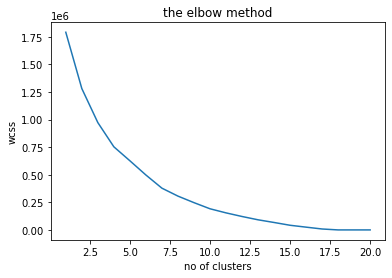

In [90]:
#Visualisation
plt.plot(range(1,21),wcss[0:20])
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show

In [84]:
#applying K-means
true_k = 10 
model = KMeans(n_clusters=true_k, init='k-means++', n_init=1)
model.fit(X)

KMeans(n_clusters=10, n_init=1)

In [85]:
print("top terms for cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
    
print("\n")

top terms for cluster:
cluster 0:
 mortgag
 loan
 servic
 origin
 we
 includ
 our
 mae
 risk
 portfolio
cluster 1:
 oper
 product
 million
 result
 the
 financi
 2019
 tax
 may
 includ
cluster 2:
 optic
 fiber
 cabl
 product
 copper
 connect
 we
 manufactur
 includ
 market
cluster 3:
 product
 the
 intevac
 water
 compani
 we
 use
 oper
 includ
 system
cluster 4:
 drug
 the
 patient
 umbralisib
 trial
 approv
 may
 ublituximab
 clinic
 patent
cluster 5:
 servic
 fcc
 we
 tv
 may
 satellit
 wireless
 dish
 certain
 licens
cluster 6:
 tep
 gener
 oper
 energi
 facil
 retail
 result
 could
 power
 may
cluster 7:
 health
 product
 includ
 we
 medic
 care
 dental
 state
 regul
 certain
cluster 8:
 loan
 bank
 capit
 medallion
 the
 decemb
 31
 invest
 requir
 interest
cluster 9:
 the
 compani
 product
 vaccin
 company
 includ
 bank
 oil
 may
 bitcoin


